Taller 5
\
Thomas Jara
\
Santiago Lizarazo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from numpy.random import uniform as unif
import scipy

Punto 1
\
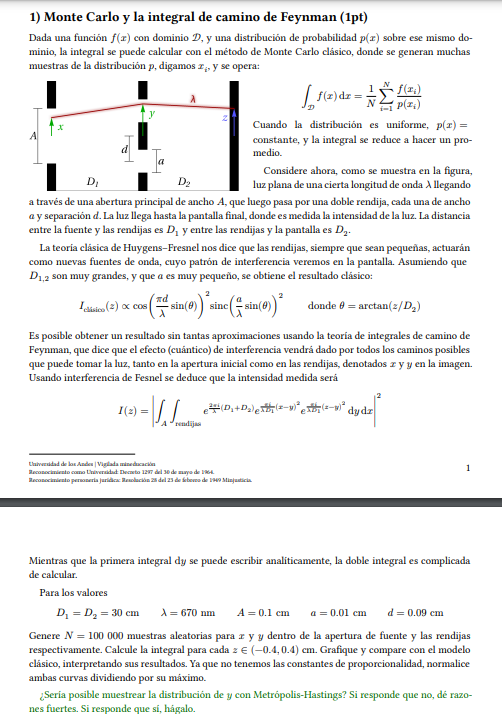

In [3]:
#Valores iniciales,todo en metros
d1=0.3
d2=d1
longitud_onda=670*10**(-9)
A=0.001
a=0.0001
d=0.0009
N=10000
z=np.linspace(-0.004,0.004,N)


Modelo Clasico

In [4]:
def intensidad_clasico(z,a,longitud_onda,d):
    theta=np.arctan(z/0.3)
    resultado=(np.cos(((np.pi*d)/longitud_onda)*np.sin(theta))**2)*(np.sinc((a/longitud_onda)*np.sin(theta))**2)
    return resultado
modelo_clasico=intensidad_clasico(z,a,longitud_onda,d1)
modelo_clasico=modelo_clasico/np.max(modelo_clasico)

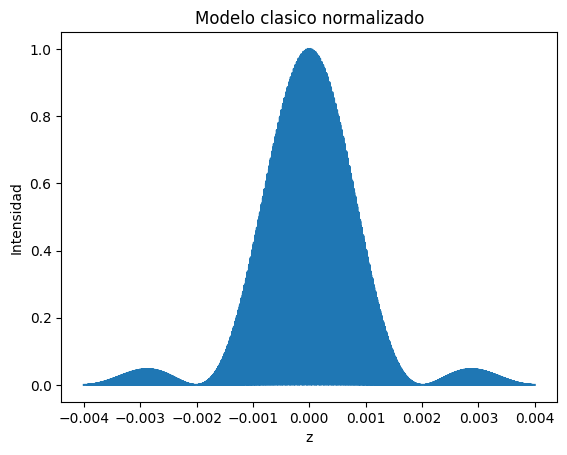

In [5]:
plt.plot(z,modelo_clasico)
plt.title('Modelo clasico normalizado')
plt.xlabel('z')
plt.ylabel('Intensidad')
plt.show()

Modelo Cuantico

In [6]:
x=unif(-A/2,A/2,N)
y1=unif(-d/2-a,-d/2,N//2)
y2=unif(d/2,d/2+a,N//2)
y=np.concatenate([y1,y2])
def montecarlo(f,a1,b1,M=N):
    suma=[]
    for i in range(M):
        suma.append(f[i]*((b1-a1)/M))
    return suma

def modelo_cuantico(x,y,z,d1=d1,longitud_onda=longitud_onda):
    resultado=(np.exp(((2*np.pi*complex(0,1))/longitud_onda)*(2*d1)))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(x-y)**2))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(z-y)**2))
    return resultado

resultados_modelo_cuantico=[]
resultados_primera=[]
for i in range(N):
    resultados=modelo_cuantico(x,y,z[i])
    resultado=np.sum(resultados)*1/N*A
    resultados_primera.append(resultado)
for i in range(N):
    resultado=resultados_primera[i]*1/N*(a)+resultados_primera[i]*1/N*(d+a)
    resultados_modelo_cuantico.append(resultado)
resultados_modelo_cuantico=np.abs(resultados_modelo_cuantico)**2
resultados_modelo_cuantico=resultados_modelo_cuantico/np.max(resultados_modelo_cuantico)



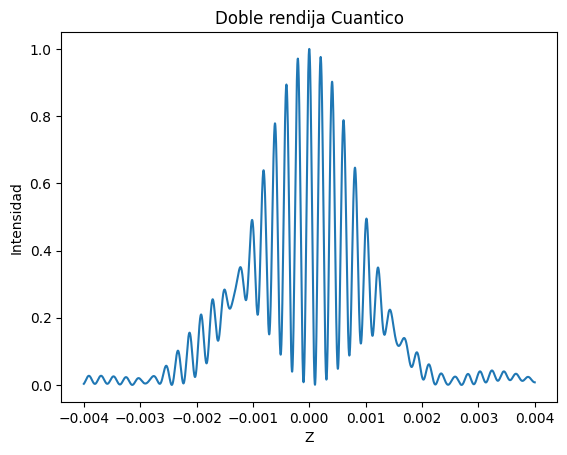

In [7]:
plt.plot(z,resultados_modelo_cuantico)
plt.title('Doble rendija Cuantico')
plt.xlabel('Z')
plt.ylabel('Intensidad')
plt.show()

La grafica clasica nos muestra un maximo de intensidad centrado y a sus lados otros dos maximos. Entre pico y pico su intensidad llega a cero dando cuenta de un patron absolutamente destructivo y constuctivo. No obstante la grafica cuantica nos muestra un patron principal que se va reduciendo conforme se aleja del centro. Es decir, no tiene unos picos secundarios bien definidos como en la forma clasica. Adicionalmente el modelo cuantico muestra como en ciertas regiones esta insidad a pesar de variar no van a ser cero. Esto se muestra en estos espacios en blanco con forma de dos picos vacios.Este modelo cuantico nos indica que las condiciones que se acercan mas a las simulaciones cuanticas no son perfectamente igual a las clasicas.

Punto 2
\
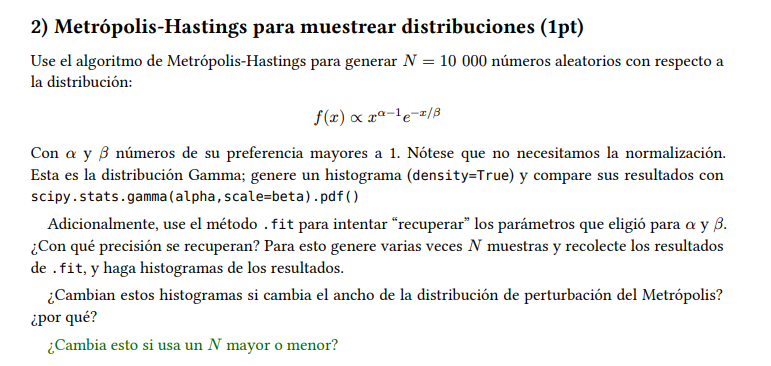

Punto 5.2

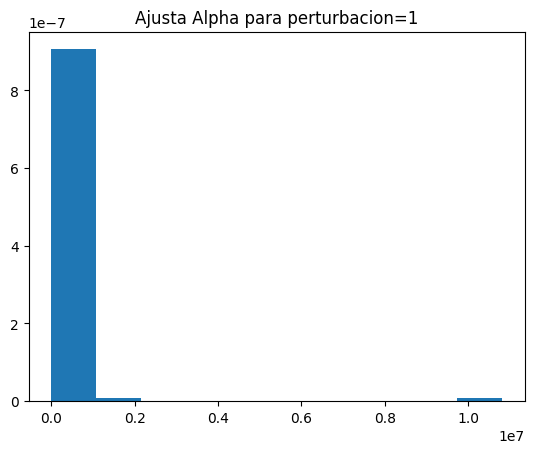

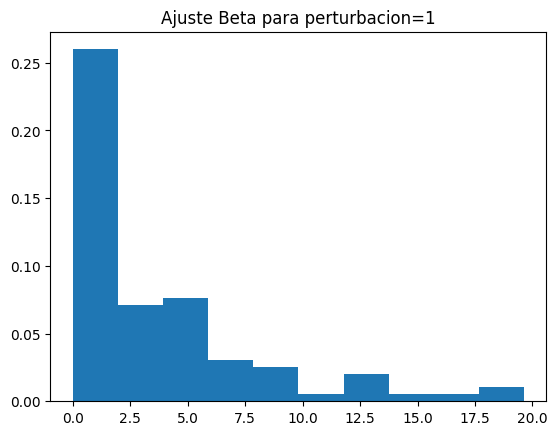

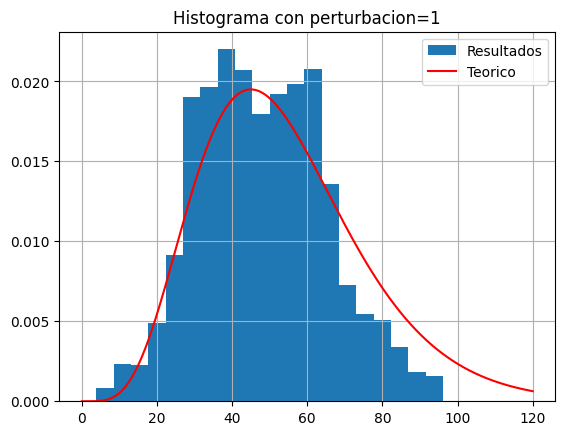

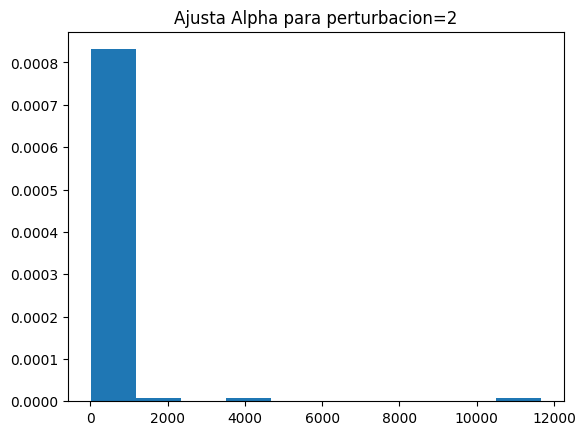

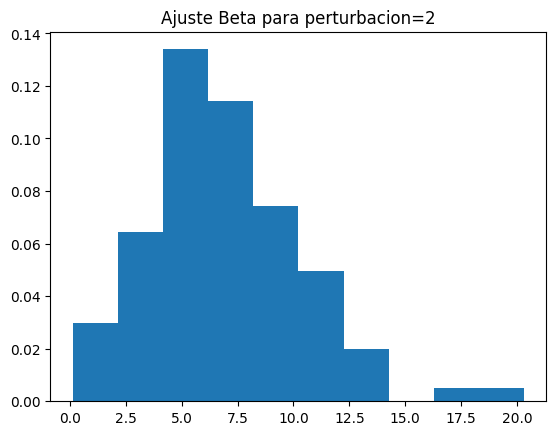

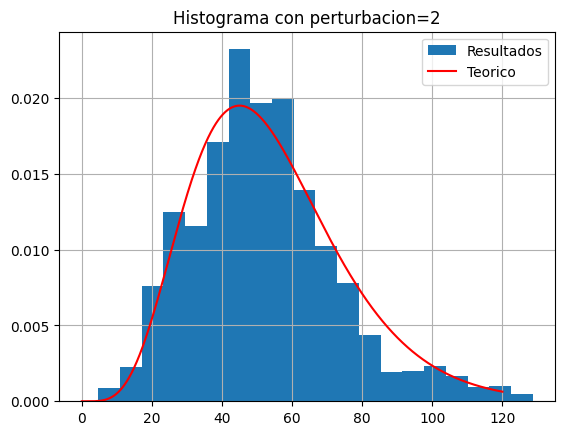

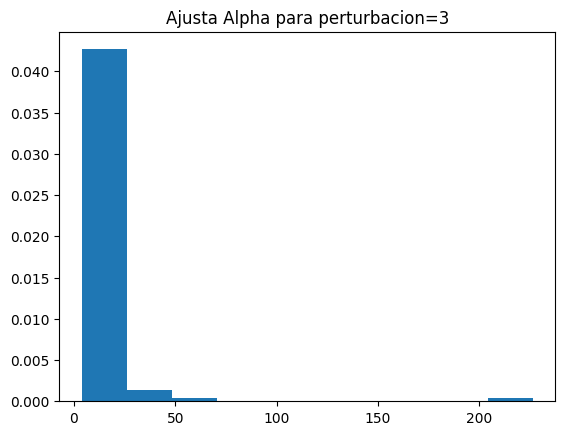

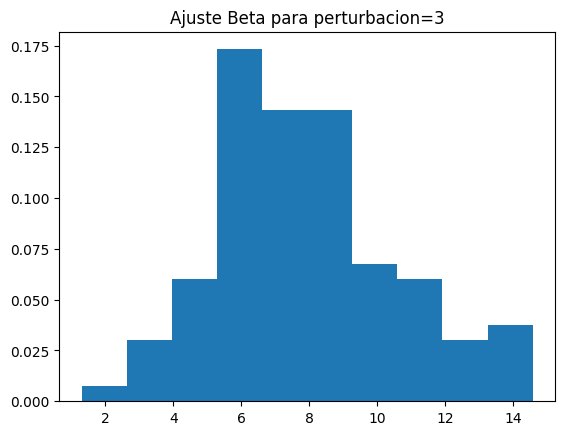

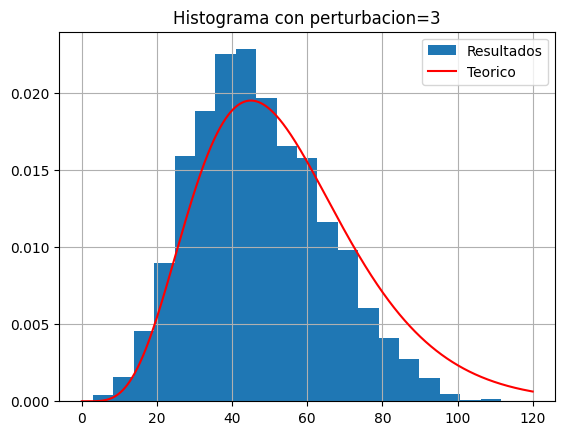

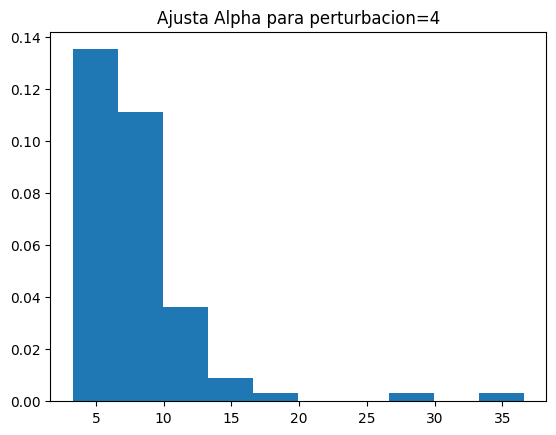

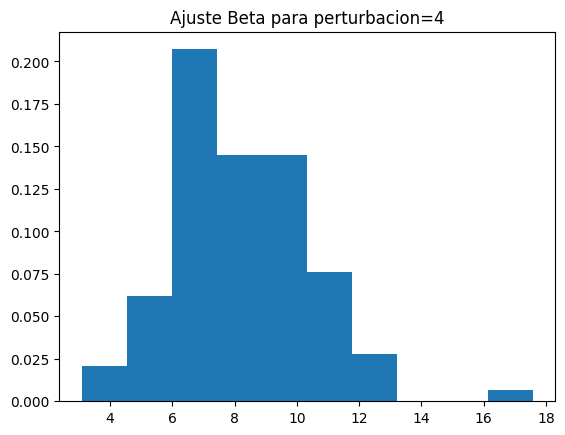

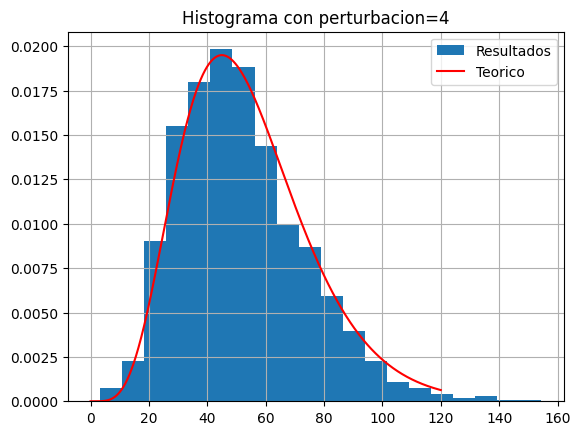

In [8]:
N=10000
x=np.linspace(0,120,N)
perturbaciones=[1,2,3,4]
a=6
b=9
def distribuicion(x,a,b):
    return (x**(a-1))*np.exp(-x/b)

def metropolis_hastings(distribuicion,N,pert,x_inicial):
    muestras=[]
    x0=x_inicial
    for i in range(N):
        candidato=np.random.normal(x0,pert)
        razon_de_aceptacion=distribuicion(candidato,a,b)/distribuicion(x0,a,b)
        if np.random.rand()<razon_de_aceptacion:
            x0=candidato
        muestras.append(x0)
    return muestras

for i in perturbaciones:
    a_fit=[]
    b_fit=[]
    for j in range(100):
        muestras=metropolis_hastings(distribuicion,N,i,3)
        params=scipy.stats.gamma.fit(muestras)
        a_fit.append(params[0])
        b_fit.append(params[2])
    plt.hist(a_fit,density=True)
    plt.title('Ajusta Alpha para perturbacion='+str(i))
    plt.show()
    plt.hist(b_fit,density=True)
    plt.title('Ajuste Beta para perturbacion='+str(i))
    plt.show()
    plt.hist(metropolis_hastings(distribuicion,N,i,3),bins=20,density=True,label='Resultados')
    plt.plot(x,scipy.stats.gamma.pdf(x,a,scale=b),label='Teorico',color='r')
    plt.title('Histograma con perturbacion='+str(i))
    plt.legend()
    plt.grid()
    plt.show()


En primer lugar comparando el histograma con la funcion original se puede observar que mayor ancho de la distribuicion de perturbacion se puede asemejar mas a la funcion original. Ademas los valores originales del fit de alpha y beta se acercan mas a los valores que impusimos inicialmente. Esto se debe a que a perturbaciones pequeñas el algoritmo propone candidatos muy cercanos a las valor actual por lo cual convergira de una forma muy lenta y se necesitaria un gran numero de muestras. Por otro lado, si la perturbacion es muy grande, permite tomar un rango mas amplio de valores pero a su vez tiene que rechazar un mayor numero de candidatos.

Punto 3
\
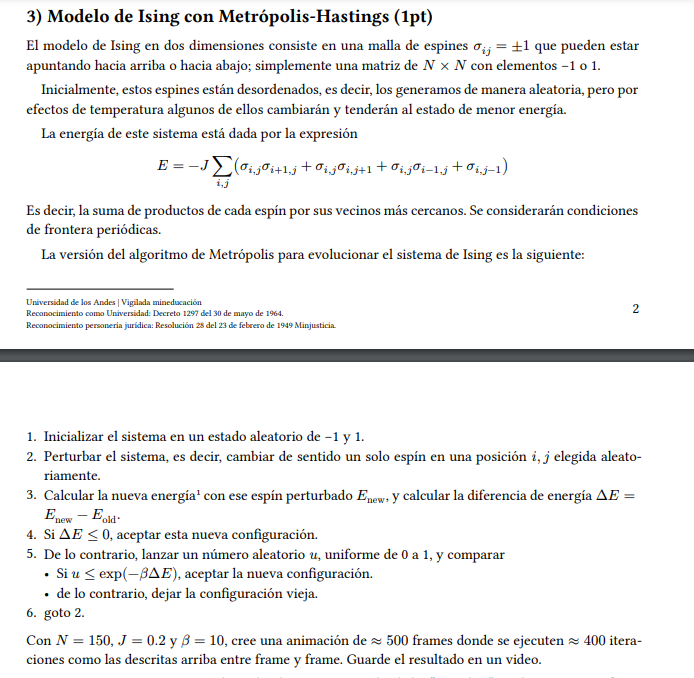

In [9]:
N=150
malla=np.random.choice([-1,1],size=(N,N))
#J >0 ferromagentico ,J<0 antiferromagnetica y J es la constante de acoplamiento
J=0.2
beta=10
def energia(malla,J):
    Energia=0
    for i in range(len(malla[0])):
        for j in range(len(malla[0])):
            E=-J*(malla[i][j]*malla[i+1][j]+malla[i][j]*malla[i][j+1]+malla[i][j]*malla[i-1][j]+malla[i][j]*malla[i][j-1])
    return Energia
E_old=energia(malla,J)
i=np.random.randint(0,10)
j=np.random.randint(0,10)
malla[i][j]=-1*malla[i][j]
E_new=energia(malla,J)
delta_e=E_new-E_old
delta_e

IndexError: index 150 is out of bounds for axis 0 with size 150